In [1]:
#This is the Multiclass classification
#Multiclass classification demo good source to use?

In [13]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [14]:
def get_predictions(feature_data):
    #run feature data through the trained model to get the linera activations from the output layer
    logits = model(feature_data)

    #convert the model outputs to probabilities by running through the sigmoid function
    logits = sigmoid(logits)
    #
    prediction_p = tf.nn.softmax(logits)
    
    prediction_p = np.argmax(prediction_p, axis=1)
    return prediction_p

In [15]:
def calculate_accuracy(labels, pred):
    
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_pred = np.sum(labels == pred)
    
    # Calculate the total number of predictions
    total_pred = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_pred / total_pred) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")
    
    

In [16]:
#num cate = 43
def load_data(data_dir, IMG_width, IMG_height, Num_categories):
    images = []
    labels = []
    
    #loop folders
    for category in range(Num_categories):
        category_dir = os.path.join(data_dir, str(category))
        
        #loop through images in data set
        for filename in os.listdir(category_dir):
            if filename.endswith(".ppm"):
                img_path = os.path.join(category_dir, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_width, IMG_height))
                images.append(img)
                labels.append(category)
                
    return (np.array(images), np.array(labels))

In [17]:
data_dir = "gtsrb"
IMG_height = 30
IMG_width = 30
#should be 43
Num_categories = 3

images,labels = load_data(data_dir, IMG_width, IMG_height, Num_categories)

print(images.shape)
print(labels.shape)

reshaped_img = images.reshape(images.shape[0], -1)
print("re",reshaped_img.shape)

(3150, 30, 30, 3)
(3150,)
re (3150, 2700)


In [18]:
#create Scaler object
scaler = StandardScaler()

#scale the features
X = scaler.fit_transform(reshaped_img)
y = labels
print("x",X.shape)
print("y",y.shape)

x (3150, 2700)
y (3150,)


In [19]:
# split  data into training, CV, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

#split test set 50:50 for the CV and test sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)

#Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")

X_train shape: (1890, 2700)
X_test shape: (630, 2700)
X_cv shape: (630, 2700)
y_train shape: (1890,)
y_test shape: (630,)
y_cv shape: (630,)


In [55]:


#create model
model = Sequential([
    tf.keras.Input(shape=(2700,)),
    Dense(150, activation='relu', kernel_regularizer=l2(0.02)),
    Dense(120, activation='relu', kernel_regularizer=l2(0.02)),
    Dense(86, activation='relu', kernel_regularizer=l2(0.02)),
    Dense(Num_categories, activation='linear')
])
  

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               405150    
                                                                 
 dense_13 (Dense)            (None, 120)               18120     
                                                                 
 dense_14 (Dense)            (None, 86)                10406     
                                                                 
 dense_15 (Dense)            (None, 3)                 261       
                                                                 
Total params: 433937 (1.66 MB)
Trainable params: 433937 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
#compiles data together
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

#fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100
)

Epoch 1/100
60/60 [==============================] - 1s 7ms/step - loss: 8.3688 - accuracy: 0.7111 - val_loss: 5.7794 - val_accuracy: 0.8349
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 4.4481 - accuracy: 0.8423 - val_loss: 3.4173 - val_accuracy: 0.8508
Epoch 3/100
60/60 [==============================] - 0s 5ms/step - loss: 2.7451 - accuracy: 0.8852 - val_loss: 2.5270 - val_accuracy: 0.7984
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 2.0103 - accuracy: 0.8836 - val_loss: 1.7408 - val_accuracy: 0.8810
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 1.5610 - accuracy: 0.8836 - val_loss: 1.4648 - val_accuracy: 0.8746
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 1.3152 - accuracy: 0.9016 - val_loss: 1.2744 - val_accuracy: 0.8524
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 1.1122 - accuracy: 0.8989 - val_loss: 1.1444 - val_accuracy: 0.8349
Epoch 8/100
6

In [58]:
# gathers prediction using softmax
preds_train = get_predictions(X_train)
preds_test = get_predictions(X_test)
preds_cv = get_predictions(X_cv)
#print(f" Largest Prediction index: {np.argmax(preds)}")
#print(f" Largest Prediction_p index: {np.argmax(prediction_p)}")

In [59]:
# calculate accuracy
calculate_accuracy(y_train, preds_train)
calculate_accuracy(y_test, preds_test)
calculate_accuracy(y_cv, preds_cv)

Accuracy: 98.15%
Accuracy: 94.29%
Accuracy: 94.76%


In [60]:
test_loss, test_acc = model.evaluate(X_cv, y_cv)
print(f'Test accuracy: {test_acc}')

20/20 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.9476
Test accuracy: 0.9476190209388733


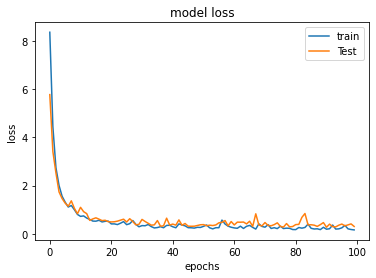

In [61]:
#summarize history for loss/ makes graph for train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'Test'], loc='upper right')
plt.show()